In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, auc

#read csv file
dataset = pd.read_csv('assg2_car - groupA.csv')
dataset.head()


dataset.shape

dataset.isna().sum()

dataset.duplicated().any()
dataset = dataset.drop_duplicates()
dataset.shape


#counting value count for each label of "quality"
print(dataset["Quality"].value_counts(), "\n")

dataset['Quality'] = dataset['Quality'].replace({"unacc": 1, "acc": 2, "good" : 3, "vgood":4 })
#counting value count for each label of "Buy"
print(dataset["Buy"].value_counts(), "\n")

dataset["Buy"] = dataset["Buy"].replace({"low": 1, "med": 2, "high": 3, "vhigh": 4})
dataset['Buy'] = dataset['Buy'].fillna(dataset['Buy'].median())
dataset['Buy'].isna().sum()

#counting value count for each label of "Doors"
dataset['Maint_costs'] = dataset['Maint_costs'].replace({"low": 1, "med": 2, "high": 3, "vhigh": 4})
print(dataset["Doors"].value_counts(), "\n")


dataset['Doors'] = dataset['Doors'].replace({"2": 1, "3": 2, "4": 3, "5more": 4})
dataset['Doors'] = dataset['Doors'].fillna(dataset['Doors'].median())
#counting value count for each label of "Person" 
print(dataset["Person"].value_counts(), "\n")

dataset['Person'] = dataset['Person'].replace({2.0: 1, 4.0: 2})
dataset['Person'] = dataset['Person'].fillna(dataset['Person'].median())
#counting value count for each label of "Boot"
print(dataset["Boot"].value_counts(), "\n")


dataset['Boot'] = dataset['Boot'].replace({"small": 1, "med": 2, "big" : 3 })
dataset['Boot'] = dataset['Boot'].fillna(dataset['Boot'].median())

#counting value count for each label of "Safety"
print(dataset["Safety"].value_counts(), "\n")

#dataset['Safety'] = dataset['Safety'].fillna(random.choice(["low", "high"]))
dataset['Safety'] = dataset['Safety'].replace({"low": 1, "med": 2, "high" : 3 })
dataset['Safety'] = dataset['Safety'].fillna(dataset['Safety'].median())

dataset.to_csv("processed_data.csv", index=False)
df = pd.read_csv('processed_data.csv')
print(df["Quality"].value_counts(), "\n")

features = df.drop('Quality',axis=1)
labels = df['Quality']


Quality
unacc    1136
acc       382
good       69
vgood      65
Name: count, dtype: int64 

Buy
high     432
med      432
low      418
vhigh    363
Name: count, dtype: int64 

Doors
4        414
5more    410
2        406
3        403
Name: count, dtype: int64 

Person
4.0    552
2.0    546
Name: count, dtype: int64 

Boot
big      538
small    536
med      536
Name: count, dtype: int64 

Safety
high    549
low     548
med     548
Name: count, dtype: int64 

Quality
1    1136
2     382
3      69
4      65
Name: count, dtype: int64 



In [2]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(features, labels,  test_size=0.25, random_state=1)

mlp = MLPClassifier(hidden_layer_sizes=(10))
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

# Compute performance metrics
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Confusion Matrix: ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Accuracy:  0.8547215496368039
Confusion Matrix:  [[272   8   0   0]
 [ 17  79   0   1]
 [  2   9   1   5]
 [  0  14   4   1]]
              precision    recall  f1-score   support

           1       0.93      0.97      0.95       280
           2       0.72      0.81      0.76        97
           3       0.20      0.06      0.09        17
           4       0.14      0.05      0.08        19

    accuracy                           0.85       413
   macro avg       0.50      0.47      0.47       413
weighted avg       0.82      0.85      0.83       413



/Users/santoshibhujel/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:
from imblearn.over_sampling import SMOTEN
sm = SMOTEN(random_state=0)
XBalanced, yBalanced = sm.fit_resample(X_train, y_train)

mlp.fit(XBalanced, yBalanced)
predictions = mlp.predict(X_test)

# Compute performance metrics
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


cost_matrix = np.array([[0, 1, 8, 10],  
                        [1, 0, 4, 6],  
                        [3, 1, 0, 1],
                        [6, 2, 1, 0]])
optimizer = []
accuracy =[]
recall = []
unweighted_av = []
roc_auc =[]
precision = [] 
conf_matrix = []
cost = []
loss = []
rate_ = []
hidden_layer_list = [] 
maximum_iteration = []

Accuracy:  0.8958837772397095
Confusion Matrix: 
 [[250  21   6   3]
 [  7  85   3   2]
 [  0   0  17   0]
 [  0   0   1  18]]
              precision    recall  f1-score   support

           1       0.97      0.89      0.93       280
           2       0.80      0.88      0.84        97
           3       0.63      1.00      0.77        17
           4       0.78      0.95      0.86        19

    accuracy                           0.90       413
   macro avg       0.80      0.93      0.85       413
weighted avg       0.91      0.90      0.90       413



/Users/santoshibhujel/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
def train_and_plot(max_iter, solver, rate, hidden_layer=(100,50)):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, max_iter=max_iter, solver=solver, 
                    learning_rate_init=rate)
    mlp.fit(XBalanced, yBalanced)
    predictions = mlp.predict(X_test)

    acc= accuracy_score(y_test, predictions)
    preci = precision_score(y_test, predictions, average='weighted') 
    recal = recall_score(y_test, predictions, average='weighted') 
    y_prob = mlp.predict_proba(X_test)
    loss_ = mlp.loss_

    # Calculate ROC AUC score using the "ovr" strategy
    roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    #confusion matrix
    conf_mat = confusion_matrix(y_test, predictions)3
    #cost matrix
    cost_mat = np.multiply(conf_mat, cost_matrix)
    #cost calculation
    total_cost= np.sum(cost_mat, axis=None)
    print("Accuracy =", acc, ", Cost =", total_cost)
    # Calculate the Unweighted Average Recall (UAR)
    class_recalls = recall_score(y_test, predictions, average=None)
    uar = sum(class_recalls) / len(class_recalls)

    accuracy.append(round(acc,4))
    precision.append(round(preci ,4))
    recall.append(round(recal,4))
    roc_auc.append(round(roc,4))
    conf_matrix.append(confusion_matrix(y_test, predictions))
    cost.append(round(total_cost,4))
    unweighted_av.append(round(uar,4))
    loss.append(round(loss_,4))
    optimizer.append(solver)
    rate_.append(str(rate))
    hidden_layer_list.append(list(hidden_layer))
    maximum_iteration.append(str(max_iter))

    """
    Plotting the loss curve
    """
    lossPerIteration = mlp.loss_curve_
    plt.figure(dpi=125)
    plt.title("Solver: "+ solver.upper()+ ", LR:"+ str(rate) +", and iteration = " + str(max_iter))
    plt.plot(lossPerIteration)
    plt.xlabel("Number of iterations")
    plt.ylabel("Training Loss")
    plt.show()
    pass

Accuracy = 0.9007263922518159 , Cost = 126


/Users/santoshibhujel/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


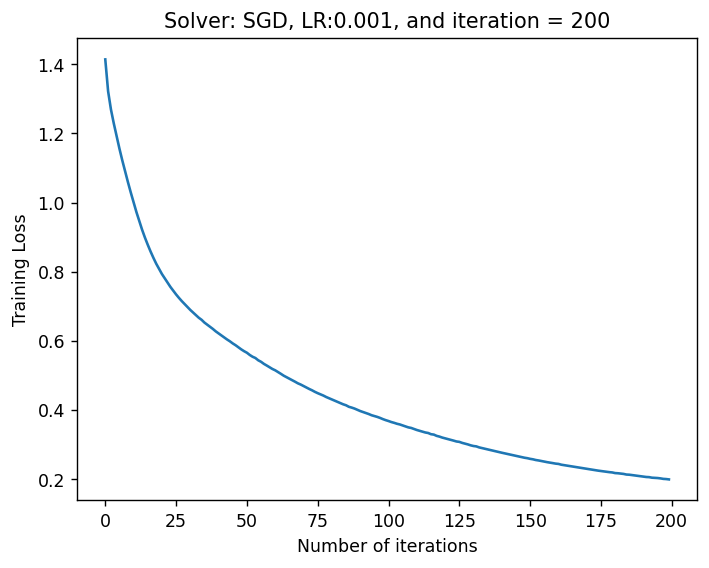

Accuracy = 0.910411622276029 , Cost = 47


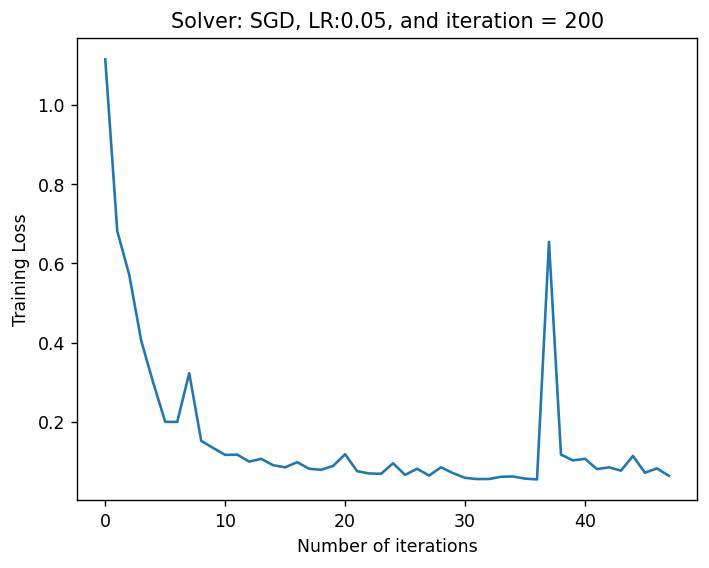

Accuracy = 0.9709443099273608 , Cost = 22


/Users/santoshibhujel/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


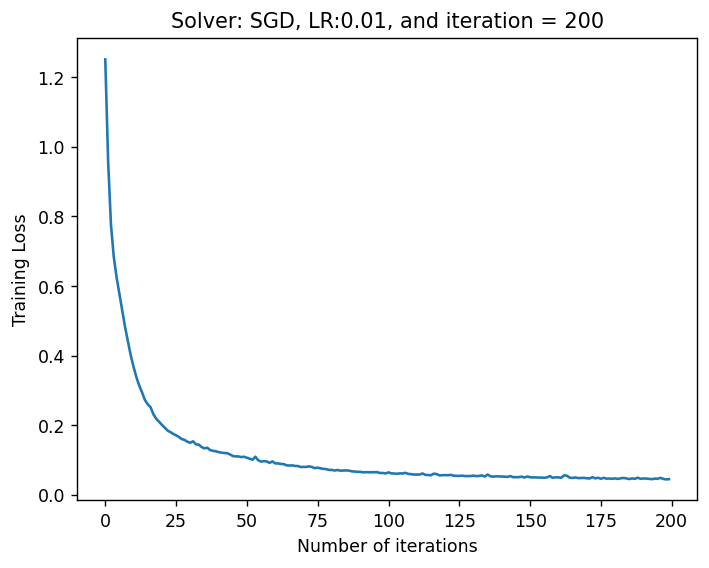

Accuracy = 0.9225181598062954 , Cost = 49


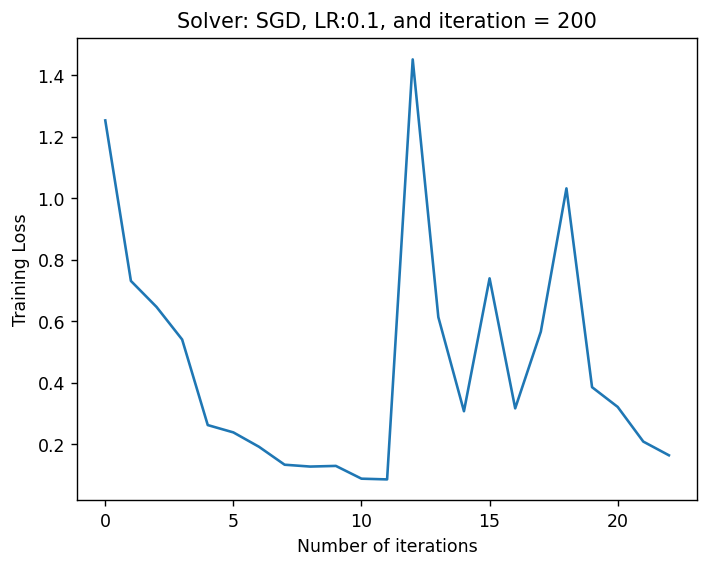

Accuracy = 0.9782082324455206 , Cost = 19


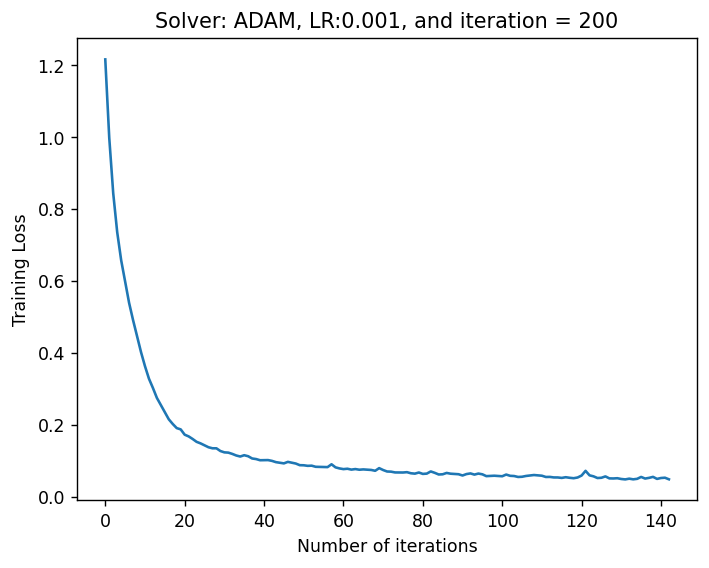

Accuracy = 0.9515738498789347 , Cost = 30


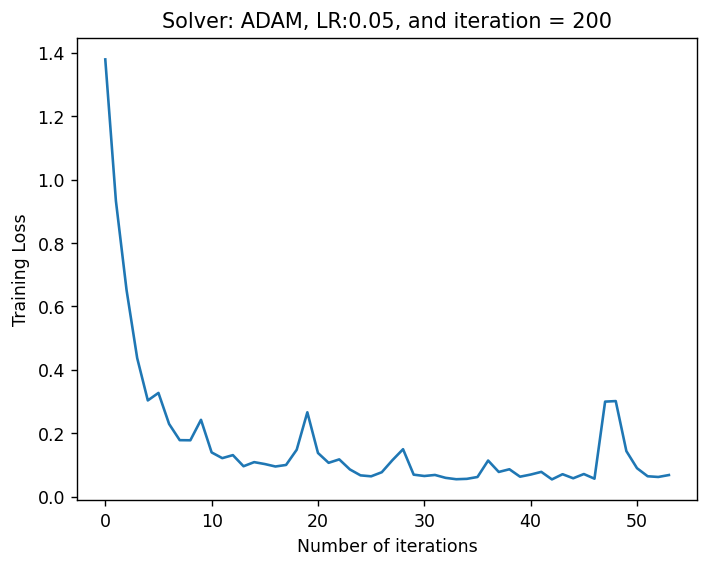

Accuracy = 0.9709443099273608 , Cost = 22


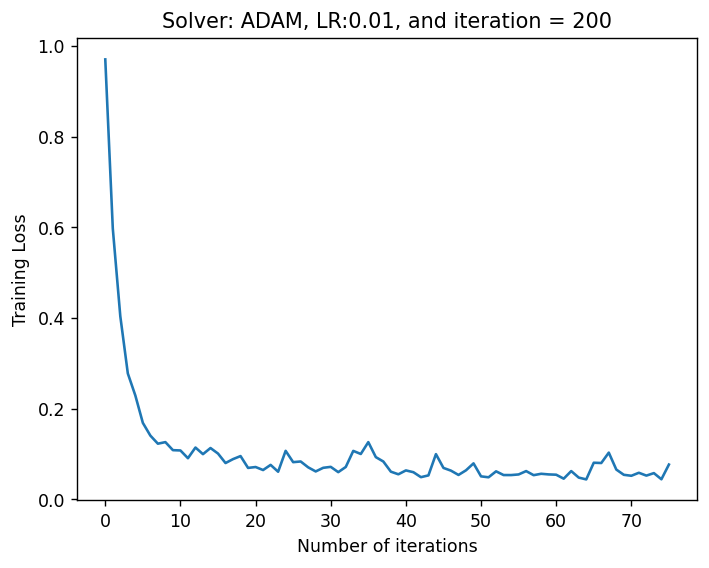

Accuracy = 0.8280871670702179 , Cost = 120


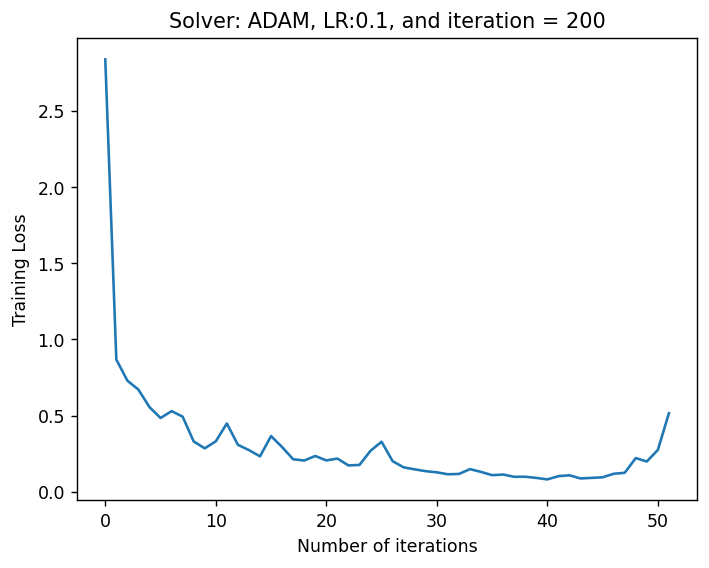

In [5]:
learningRates = [0.001, 0.05, 0.01, 0.1]
for rate in learningRates:
    train_and_plot(max_iter=200, solver="sgd", rate=rate)
    
for rate in learningRates:
    train_and_plot(max_iter=200, solver="adam", rate=rate)


In [ ]:
#iterating through maximum_iteration
max_iter = [20, 50, 100, 120, 150, 200, 250]

for max_it in max_iter:
    train_and_plot(max_iter=max_it, solver="sgd", rate=0.01) 
    
for max_it in max_iter:
    train_and_plot(max_iter=max_it, solver="adam", rate=0.001)

In [ ]:
hidden_layer_sizes = [(20, 20), (30, 10), (50, 50), (40, 20, 20), (100,100)]
for hl in hidden_layer_sizes:
    train_and_plot(max_iter=150, solver="sgd", rate=0.01, hidden_layer=hl) 


In [ ]:
data = {
    'Optimizer': optimizer,
    'Rate':rate_,
    "Max Iter": maximum_iteration,
    'Hidden Layer': hidden_layer_list,
    'Cost': cost,
    'Loss': loss,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'ROC AUC': roc_auc,
    'Confusion Matrix': conf_matrix,
    'Unweighted Average Weight': unweighted_av,
}

result_df = pd.DataFrame(data)

sorted_result_df = result_df.sort_values(by='Cost', ascending=True)

sorted_result_df.to_csv("model_comparision_result.csv", index=False)

#storing evaluation matrices df in new csv file
res_df = pd.read_csv('model_comparision_result.csv')
print(res_df)

sorted_result_df = result_df.sort_values(by='Cost', ascending=True)
# Display the sorted DataFrame
print(sorted_result_df)